In [1]:
import numpy as np
import tensorflow as tf
# tf.compat.v1.disable_eager_execution()
# tf.get_logger().setLevel(40)
# tf.compat.v1.disable_v2_behavior()
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt

import data_load
import data_process
import train_model

2023-08-30 08:52:54.895237: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-30 08:52:55.489945: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
from sklearn import preprocessing

DATA_PATH = "data/Turbine_Data_Penmanshiel_11_2021-01-01_-_2021-07-01_1051.csv"
LOGS_PATH = "data/Status_Penmanshiel_11_2021-01-01_-_2021-07-01_1051.csv"

data = data_load.load_turbine_data_without_time(DATA_PATH)
logs = data_load.load_turbine_logs_with_endtime(LOGS_PATH)
labels = data_load.get_data_label(data_load.load_turbine_data(DATA_PATH), logs)
scaler = preprocessing.StandardScaler()
data_imputer = KNNImputer(n_neighbors=10)
data = data_process.impute_data(data)
data = data_process.standardize_data(data, scaler=scaler)
print(data.shape)
data = np.array(data, dtype='float32')

(26064, 299)


In [3]:
from sklearn.model_selection import train_test_split

epochs = 30
k = 10

i = 0
inner_size = 20
labels = np.array(labels)

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.1)
    # ae_model = model.RnnAutoEncoder(input_size=np.size(data, axis=1)).to(device)
    # loss = nn.MSELoss()
ae_model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(np.size(data, axis=1),)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(inner_size, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(np.size(data, axis=1))
])
X_train_raw = X_train
X_train = X_train[y_train == 0]
# optimizer = torch.optim.Adam(ae_model.parameters(), lr=0.001)

ae_model.compile(optimizer='adam', loss='mse', metrics=['mean_squared_error'])

# X_train, X_test = data[train_index], data[test_index]

ae_model.fit(X_train, X_train, epochs=epochs, batch_size=np.size(data, axis=0))
out = ae_model(X_test)

# tf.compat.v1.initialize_all_variables().run(session=tf.compat.v1.Session())
# test_loss, res = ae_model.evaluate(X_test, X_test, batch_size=np.size(data, axis=0))
# X_pred = np.array(out.eval(session=tf.compat.v1.Session()))
X_pred = ae_model(X_test)
res = tf.math.reduce_sum(tf.math.pow(X_pred - X_test, 2), 1)


    # res = train_model.autoencoder_test(X_test, X_test, ae_model, 1000)
    # break

2023-08-30 08:53:23.771715: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:07:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-08-30 08:53:23.790400: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:07:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-08-30 08:53:23.790815: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:07:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-08-30 08:53:23.792456: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:07:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-08-30 08:53:23.792896: I tensorflow/compile

Epoch 1/30


2023-08-30 08:53:27.162855: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x3a1730c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-08-30 08:53:27.162928: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA GeForce RTX 2060 SUPER, Compute Capability 7.5
2023-08-30 08:53:27.170551: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-08-30 08:53:27.394360: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8900
2023-08-30 08:53:27.496039: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-08-30 08:53:27.570310: I ./tensorflow/compiler/jit/device_compiler.h:180] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1/1 [==============================] - 4s 4s/step - loss: 0.7772 - mean_squared_error: 0.7772
Epoch 2/30
1/1 [==============================] - 0s 45ms/step - loss: 0.7695 - mean_squared_error: 0.7695
Epoch 3/30
1/1 [==============================] - 0s 48ms/step - loss: 0.7634 - mean_squared_error: 0.7634
Epoch 4/30
1/1 [==============================] - 0s 40ms/step - loss: 0.7555 - mean_squared_error: 0.7555
Epoch 5/30
1/1 [==============================] - 0s 37ms/step - loss: 0.7449 - mean_squared_error: 0.7449
Epoch 6/30
1/1 [==============================] - 0s 34ms/step - loss: 0.7312 - mean_squared_error: 0.7312
Epoch 7/30
1/1 [==============================] - 0s 50ms/step - loss: 0.7146 - mean_squared_error: 0.7146
Epoch 8/30
1/1 [==============================] - 0s 51ms/step - loss: 0.6957 - mean_squared_error: 0.6957
Epoch 9/30
1/1 [==============================] - 0s 48ms/step - loss: 0.6761 - mean_squared_error: 0.6761
Epoch 10/30
1/1 [==============================] -

0.9659854437267256


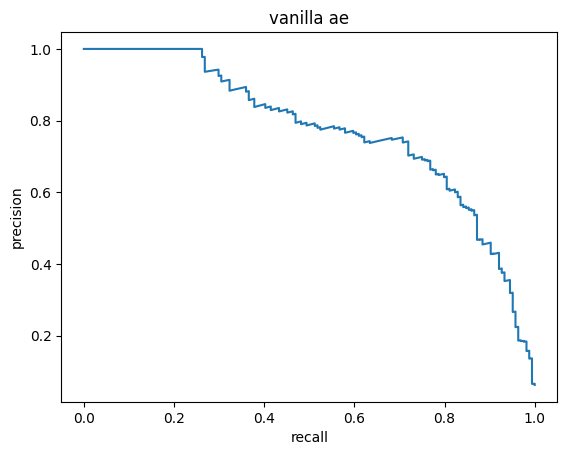

In [4]:
import sklearn.metrics as metrics

res_sorted = tf.sort(res)
res_cdf = 1. * np.arange(res.shape[0]) / ((res.shape[0]) - 1)
point_color = ["red" if label == 1 else "blue" for label in y_test]
point_size = [0.1 if label == 0 else 10 for label in y_test]
# plt.hist(res, bins=200)
# plt.scatter(res, range(res.size), s=point_size, c=point_color)

fpr, tpr, _ = metrics.roc_curve(y_test, res)

precision, recall, threshold = metrics.precision_recall_curve(y_test, res)

# precision = precision[0:-3]
#
# recall = recall[0:-3]

plt.plot(recall, precision)

# print(precision, recall)

print(metrics.auc(fpr, tpr))
# print(metrics.auc(precision, recall))

# print(metrics.f1_score(test_labels, res))

# plt.scatter(res_sorted, range(res.size), s=point_size, c=point_color)
# plt.xlim(0, 150)
plt.ylabel("precision")
plt.xlabel("recall")
plt.title("vanilla ae")
plt.show()

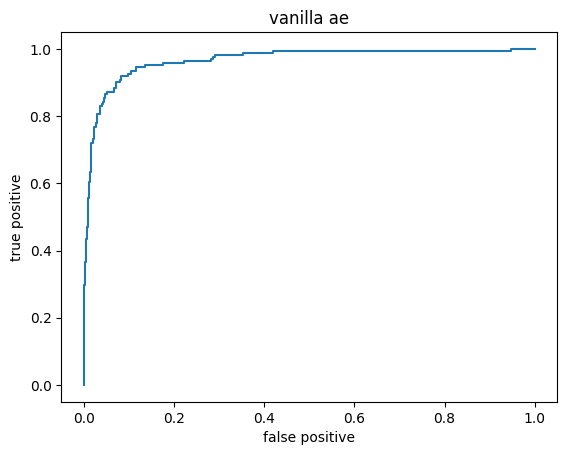

In [5]:
plt.plot(fpr, tpr)
plt.xlabel("false positive")
plt.ylabel("true positive")
plt.title("vanilla ae")
plt.show()

In [6]:
exp_size = 1000
exp_X = X_test[0:exp_size]

In [7]:
class AE(tf.keras.Model):
    def __init__(self, encoder: tf.keras.Model, decoder: tf.keras.Model, **kwargs) -> None:
        super().__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder

    def call(self, x: tf.Tensor, **kwargs):
        z = self.encoder(x)
        x_hat = self.decoder(z)
        return x_hat
    
temp_ae = AE(
    tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=(np.size(data, axis=1))),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(inner_size, activation='relu'),
    ]),
    tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=inner_size),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(np.size(data, axis=1))
    ])
)

temp_ae.compile(optimizer='adam', loss='mse', metrics=['mean_squared_error'])
temp_ae.fit(X_train_raw, X_train_raw, epochs=epochs, batch_size=np.size(data, axis=0))

Epoch 1/30
1/1 [==============================] - 3s 3s/step - loss: 0.9018 - mean_squared_error: 0.9018
Epoch 2/30
1/1 [==============================] - 0s 68ms/step - loss: 0.8970 - mean_squared_error: 0.8970
Epoch 3/30
1/1 [==============================] - 0s 64ms/step - loss: 0.8937 - mean_squared_error: 0.8937
Epoch 4/30
1/1 [==============================] - 0s 64ms/step - loss: 0.8890 - mean_squared_error: 0.8890
Epoch 5/30
1/1 [==============================] - 0s 62ms/step - loss: 0.8823 - mean_squared_error: 0.8823
Epoch 6/30
1/1 [==============================] - 0s 74ms/step - loss: 0.8731 - mean_squared_error: 0.8731
Epoch 7/30
1/1 [==============================] - 0s 38ms/step - loss: 0.8614 - mean_squared_error: 0.8614
Epoch 8/30
1/1 [==============================] - 0s 40ms/step - loss: 0.8474 - mean_squared_error: 0.8474
Epoch 9/30
1/1 [==============================] - 0s 39ms/step - loss: 0.8314 - mean_squared_error: 0.8314
Epoch 10/30
1/1 [======================

In [19]:
from alibi.explainers.cfrl_tabular import CounterfactualRLTabular, CounterfactualRL
from alibi.explainers.backends.cfrl_tabular import get_he_preprocessor

raw_data = data_load.load_turbine_data_without_time(DATA_PATH)
feature_names = raw_data.columns.tolist()

ae_preprocessor, ae_inv_preprocessor = get_he_preprocessor(X=X_train_raw, feature_names=feature_names, category_map={})

# ae = model.AutoEncoder(input_size=np.size(data, axis=1)).to(device)

def predFunc(x):
    # x = tf.cast(x, tf.float32)
    # distance = train_model.autoencoder_test(x, x, ae_model, len(x))
    distance = tf.reduce_sum(tf.pow(ae_model(x) - x, 2), 1)
    threshold = tf.constant(65, dtype=tf.float32)
    res = 1 / (1 + tf.math.exp(-(distance-threshold)))
    # res = tf.reshape(res, (res.shape[0], 1))
    # print(tf.concat([1-res, res], 1).shape)
    # return tf.concat([1-res, res], 1)
    return np.array([[1-n, n] for n in res])

explainer = CounterfactualRLTabular(
    predictor=predFunc,
    encoder=temp_ae.encoder,
    decoder=temp_ae.decoder,
    feature_names=feature_names,
    category_map={},
    latent_dim=inner_size,
    encoder_preprocessor=ae_preprocessor,
    decoder_inv_preprocessor=ae_inv_preprocessor,
    coeff_sparsity=0.5,
    coeff_consistency=0.5
)

# explainer = CounterfactualRL(
#     predictor=predFunc,
#     encoder=temp_ae.encoder,
#     decoder=temp_ae.decoder,
#     coeff_consistency=0.5,
#     coeff_sparsity=0.5
# )

print(X_train[0:100].shape)


TypeError: int() argument must be a string, a bytes-like object or a real number, not 'NoneType'

In [16]:
explainer = explainer.fit(X=X_train[0:100])

  0%|          | 0/100000 [00:00<?, ?it/s]


IndexError: tuple index out of range